In [4]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
colNames = ['hoeveel', 'wanneer', 'laat', 'lang', 'kwaliteit']
data = pd.read_csv(filepath_or_buffer=r'C:\Users\Ricardo\OneDrive - Avans Hogeschool\1 school HBO\School HBO v2\4.1\Human Centered AI Design\web application\DataBewerktV2.csv'
                    , sep=";", header=0, names=colNames, usecols=[1,2,3,4,5], encoding = "ISO-8859-1")

data

,hoeveel,wanneer,laat,lang,kwaliteit
0,Geen,Tussen 17:00 en 19:00,Tussen 22:00 en 23:00,Tussen 10 min en 30 min,4
1,1 tot 2 per dag,Tussen 21:00 en 23:00,Tussen 23:00 en 00:00,Tussen 30 min en 1 uur,3
2,1 tot 2 per dag,Tussen 19:00 en 21:00,Tussen 23:00 en 00:00,Tussen 30 min en 1 uur,3
3,1 tot 2 per dag,Tussen 19:00 en 21:00,Tussen 21:00 en 22:00,Tussen 30 min en 1 uur,4
4,1 tot 2 per dag,Tussen 15:00 en 17:00,Tussen 23:00 en 00:00,Minder dan 10 min,5
...,...,...,...,...,...
650,3 tot 4 per dag,Na 23:00,Tussen 02:00 en 04:00,Tussen 30 min en 1 uur,2
651,5 tot 6 per dag,Na 23:00,Tussen 21:00 en 22:00,Meer dan 1 uur,1
652,1 tot 2 per dag,Na 23:00,Tussen 22:00 en 23:00,Meer dan 1 uur,1
653,3 tot 4 per dag,Na 23:00,Tussen 23:00 en 00:00,Meer dan 1 uur,1


In [6]:
def categorise_hoeveel(hoeveel):
    if hoeveel == "Geen":
        return 0
    elif hoeveel == "1 tot 2 per dag":
        return 1
    elif hoeveel == "3 tot 4 per dag":
        return 3
    elif hoeveel == "5 tot 6 per dag":
        return 5
    elif hoeveel == "meer dan 6 per dag":
        return 7

def categorise_wanneer(wanneer):
    if wanneer == "Voor of tijdens de lunch":
        return 0
    elif wanneer == "Tussen 15:00 en 17:00":
        return 15
    elif wanneer == "Tussen 17:00 en 19:00":
        return 17
    elif wanneer == "Tussen 19:00 en 21:00":
        return 19
    elif wanneer == "Tussen 21:00 en 23:00":
        return 21
    elif wanneer == "Na 23:00":
        return 23

def categorise_laat(laat):
    if laat == "Tussen 21:00 en 22:00":
        return 21
    elif laat == "Tussen 22:00 en 23:00":
        return 22
    elif laat == "Tussen 23:00 en 00:00":
        return 23
    elif laat == "Tussen 00:00 en 02:00":
        return 24
    elif laat == "Tussen 02:00 en 04:00":
        return 26

def categorise_lang(lang):
    if lang == "Minder dan 10 min":
        return 0
    elif lang == "Tussen 10 min en 30 min":
        return 1
    elif lang == "Tussen 30 min en 1 uur":
        return 2
    elif lang == "Meer dan 1 uur":
        return 3

dataHeat = data.copy(deep=True)

dataHeat['hoeveel'] = data['hoeveel'].apply(categorise_hoeveel)
dataHeat['wanneer'] = data['wanneer'].apply(categorise_wanneer)
dataHeat['laat'] = data['laat'].apply(categorise_laat)
dataHeat['lang'] = data['lang'].apply(categorise_lang)


dataHeat

,hoeveel,wanneer,laat,lang,kwaliteit
0,0,17,22,1,4
1,1,21,23,2,3
2,1,19,23,2,3
3,1,19,21,2,4
4,1,15,23,0,5
...,...,...,...,...,...
650,3,23,26,2,2
651,5,23,21,3,1
652,1,23,22,3,1
653,3,23,23,3,1


In [7]:
wanneerCounts = dataHeat['wanneer'].value_counts()
wanneerCounts

21    132
15    131
19    130
23    119
17    118
0      25
Name: wanneer, dtype: int64

In [8]:
corData = dataHeat[['wanneer', 'lang']]
corData.corr()

,wanneer,lang
wanneer,1.000000,0.607918
lang,0.607918,1.000000


<AxesSubplot:>

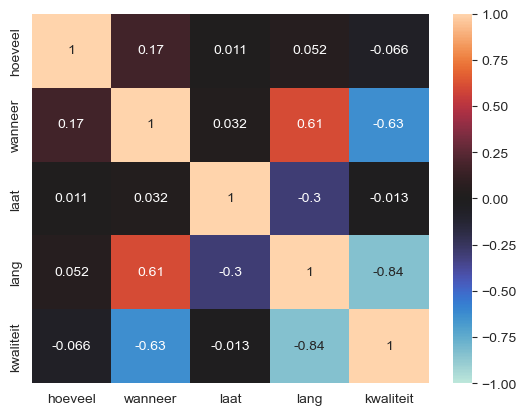

In [9]:
sns.heatmap(dataHeat.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [10]:
from tensorflow.keras.utils import to_categorical
# X = dataHeat.copy(deep=True)
# del X['lang'], X['kwaliteit']
#
# Y = dataHeat.copy(deep=True)
# del Y['hoeveel'], Y['wanneer'], Y['laat'], Y['kwaliteit']
# Y
X = dataHeat.drop(["hoeveel", "lang", "kwaliteit"],  axis=1)
#X.drop('kwaliteit', axis=1)
Xlist = X.values.tolist()

Y = dataHeat.drop(["hoeveel", "wanneer", "laat", "kwaliteit"], axis=1)
Ycat = to_categorical(Y)
Ylist = Ycat.tolist()
Xlist

[[17, 22],
 [21, 23],
 [19, 23],
 [19, 21],
 [15, 23],
 [0, 22],
 [15, 21],
 [21, 23],
 [21, 22],
 [0, 23],
 [0, 22],
 [23, 24],
 [19, 23],
 [15, 22],
 [0, 23],
 [15, 24],
 [0, 23],
 [0, 24],
 [23, 24],
 [19, 24],
 [23, 26],
 [21, 23],
 [0, 23],
 [19, 24],
 [0, 21],
 [0, 23],
 [15, 23],
 [0, 21],
 [19, 22],
 [19, 26],
 [0, 23],
 [15, 23],
 [15, 22],
 [21, 24],
 [0, 23],
 [15, 24],
 [15, 23],
 [0, 24],
 [15, 22],
 [0, 26],
 [21, 24],
 [0, 22],
 [0, 24],
 [23, 24],
 [0, 22],
 [21, 23],
 [15, 24],
 [21, 23],
 [19, 23],
 [19, 24],
 [21, 23],
 [0, 24],
 [21, 24],
 [0, 24],
 [19, 24],
 [21, 22],
 [15, 23],
 [23, 23],
 [19, 23],
 [15, 23],
 [21, 23],
 [17, 22],
 [19, 22],
 [19, 22],
 [17, 24],
 [19, 22],
 [21, 23],
 [15, 23],
 [0, 23],
 [15, 23],
 [0, 23],
 [0, 22],
 [17, 22],
 [21, 23],
 [0, 23],
 [15, 21],
 [15, 22],
 [21, 23],
 [21, 23],
 [0, 23],
 [19, 23],
 [19, 23],
 [21, 22],
 [21, 22],
 [0, 22],
 [15, 21],
 [15, 22],
 [15, 23],
 [15, 24],
 [15, 26],
 [15, 21],
 [15, 22],
 [15, 23],
 [

In [165]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
#from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [159]:
model = Sequential()
epochs = 500

model.add(Dense(2, input_shape=(2,), activation='relu'))
model.add(Dense(3, activation='tanh'))
#model.add(Dense(4, activation='relu'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(4, activation='softmax'))
model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) #binary_crossentropy

history = model.fit(Xlist, Ylist, epochs=epochs, batch_size=50, verbose=2) #batch_size=10,


Epoch 1/500
14/14 - 1s - loss: 1.3500 - accuracy: 0.3588 - 574ms/epoch - 41ms/step
Epoch 2/500
14/14 - 0s - loss: 1.3436 - accuracy: 0.3588 - 26ms/epoch - 2ms/step
Epoch 3/500
14/14 - 0s - loss: 1.3414 - accuracy: 0.3588 - 25ms/epoch - 2ms/step
Epoch 4/500
14/14 - 0s - loss: 1.3405 - accuracy: 0.3588 - 25ms/epoch - 2ms/step
Epoch 5/500
14/14 - 0s - loss: 1.3398 - accuracy: 0.3588 - 24ms/epoch - 2ms/step
Epoch 6/500
14/14 - 0s - loss: 1.3398 - accuracy: 0.3588 - 25ms/epoch - 2ms/step
Epoch 7/500
14/14 - 0s - loss: 1.3391 - accuracy: 0.3588 - 23ms/epoch - 2ms/step
Epoch 8/500
14/14 - 0s - loss: 1.3387 - accuracy: 0.3588 - 26ms/epoch - 2ms/step
Epoch 9/500
14/14 - 0s - loss: 1.3392 - accuracy: 0.3588 - 25ms/epoch - 2ms/step
Epoch 10/500
14/14 - 0s - loss: 1.3386 - accuracy: 0.3588 - 22ms/epoch - 2ms/step
Epoch 11/500
14/14 - 0s - loss: 1.3378 - accuracy: 0.3588 - 26ms/epoch - 2ms/step
Epoch 12/500
14/14 - 0s - loss: 1.3356 - accuracy: 0.3588 - 23ms/epoch - 2ms/step
Epoch 13/500
14/14 - 0s

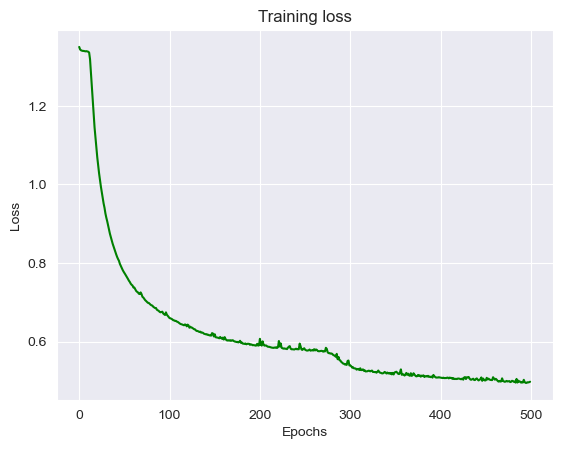

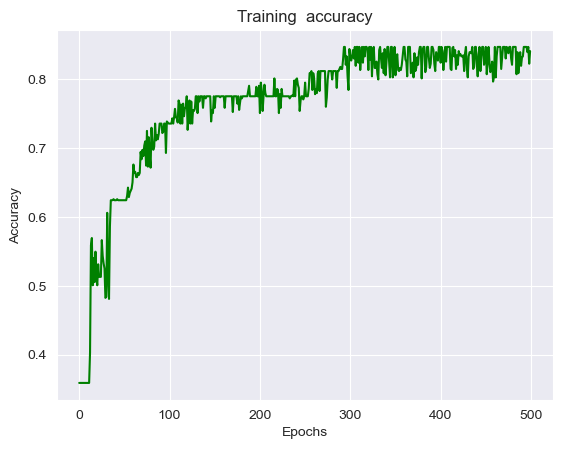

In [160]:
loss_train = history.history['loss']
acc_train = history.history['accuracy']
epochs = range(0,epochs)

# plt.subplot(1,2,1)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.title('Training loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.subplot(1,2,2)
# plt.plot(epochs, acc_train, 'g', label='Training accuracy')
# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.show()

fig = plt.figure()
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

fig = plt.figure()
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [167]:
# Save the weights
#model.save('model_save/model84')

# Restore the weights
#model.load_weights('./checkpoints/my_checkpoint')

new_model = tf.keras.models.load_model('model_save/model84')

# Evaluate the model
loss, acc = new_model.evaluate(Xlist, Ylist, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

21/21 - 0s - loss: 0.4959 - accuracy: 0.8137 - 455ms/epoch - 22ms/step
Restored model, accuracy: 81.37%
